# K-Means
K-means is a clustering algorithm, which uses **centroids** to carry out its work, these **centroids** are midpoints which identify the clusters. These centroids are created randomly and are moved iteratively in order to better adapt to the data.

## Types of analysis you can perform

Exploratory(Most used) | Confirmatory | expiatory
---|---|---
Get familiar with the data | It is possible to confirm past beliefs (Classification analysis works best) | It is possible to explain the behavior of the data
Find Patterns | | |
plan | |


## Pros, cons and remedies of the k-means algorithm

Pros | Cons | remedies
--- | --- | ---
Easy to understand | You need to choose the number of groups | elbow method
fast | It is sensitive to where the centroid is initialized | k-means++ this does a preliminary simulation (sklearn has it by default)
Widely available | Sensitive to outliers | Remove the outliers
Easy to implement | Produces spherical groups | There is no solution
Always generates a result | Standardization | There is controversy over the remedy

### The controversy over standardization
- Pro.- Standardizing the data is useful to make the data easier to use, especially when the variables are very different.

- Against.- By reducing the size of the data through standardization it is possible to confuse the algorithm and obtain erroneous results.

# First cluster

## Accessing Drive

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
%cd '/content/Drive/MyDrive/Colab Notebooks/MachineLearning/Models/K-means/K-means Advanced Example'
!ls

/content/Drive/MyDrive/Colab Notebooks/MachineLearning/Models/K-means/K-means Advanced Example
 Countries.csv	'K-means Example - 1.ipynb'


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Creating DataFrame

In [ ]:
df = pd.read_csv('Countries.csv')
print(df.shape)
df

(6, 4)


,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Single Cluster

### Observing the data in a scatter

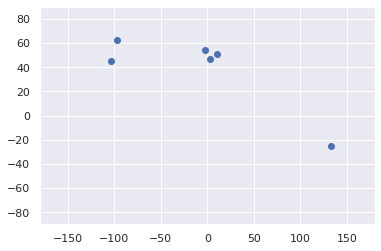

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### Choosing the data

In [ ]:
x = df[['Latitude', 'Longitude']]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
clus = kmeans.fit_predict(x)
clus

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [ ]:
df['Grupos por ubicacion'] = clus
df

,Country,Latitude,Longitude,Language,Grupos por ubicacion
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


### Graphing the cluster

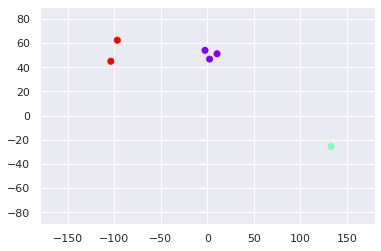

In [ ]:
plt.scatter(df['Longitude'],df['Latitude'],c=df['Grupos por ubicacion'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Categorical cluster

In [ ]:
df

,Country,Latitude,Longitude,Language,Grupos por ubicacion
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


### Transforming categorical values

In [ ]:
df['Language'] = df['Language'].map({'English': 1, 'French': 2, 'German': 3})
df

,Country,Latitude,Longitude,Language,Grupos por ubicacion
0,USA,44.97,-103.77,1,2
1,Canada,62.40,-96.80,1,2
2,France,46.75,2.40,2,0
3,UK,54.01,-2.53,1,0
4,Germany,51.15,10.40,3,0
5,Australia,-25.45,133.11,1,1


### Choosing data

In [ ]:
x = df[['Language']]
x

,Language
0,1
1,1
2,2
3,1
4,3
5,1


### Clustering

In [ ]:
k = KMeans(3)
k.fit(x)

KMeans(n_clusters=3)

In [ ]:
clus = k.fit_predict(x)
df['Grupos por lenguage'] = clus
df

,Country,Latitude,Longitude,Language,Grupos por ubicacion,Grupos por lenguage
0,USA,44.97,-103.77,1,2,0
1,Canada,62.40,-96.80,1,2,0
2,France,46.75,2.40,2,0,2
3,UK,54.01,-2.53,1,0,0
4,Germany,51.15,10.40,3,0,1
5,Australia,-25.45,133.11,1,1,0


### Graphing the cluster

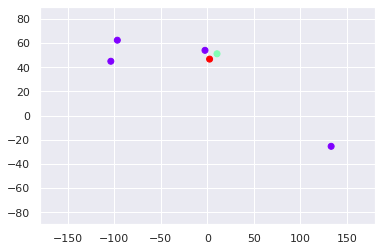

In [ ]:
plt.scatter(df['Longitude'],df['Latitude'],c=df['Grupos por lenguage'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()